#DT2470 Lab 01: Teh Signal Processings and Teh Machine Learnings

by Bob |. Sturm

In this lab you will practice some fundamental concepts of signal processing and machine learning.

In the first part, you will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc.

In the second part, you will build and test machine learning models to discriminate between two popular genres among silicon-based life. Here you will also write something intelligent about your work.

In any case, the lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., MATLAB, Processing, etc. But below I give tips for python. To be completely transparent, I didn't know much about python before writing this lab. So I learned as I went, making frequent use of the WWW for help. Here's some helpful links I used quite a bit:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


---




#Part 1 Teh Signal Processing

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Load it and plot the resulting waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is what my audio file looks like. Yours should appear nearly as beautiful. ![My audio file in time](https://drive.google.com/uc?id=1D7WEj80Qd1YnFl6zupANFiLc2kd339AH)


In [1]:
# Install a python library for working with audio files, named pydub
/
!pip install pydub

In [0]:
# Download an audio file
# cat http://bbcsfx.acropolis.org.uk/assets/07045203.wav
#forest http://bbcsfx.acropolis.org.uk/assets/07076027.wav
# projector http://bbcsfx.acropolis.org.uk/assets/07076047.wav
# machine http://bbcsfx.acropolis.org.uk/assets/07076034.wav
import os
snd_dir = '/tmp/snd'
if not os.path.exists(snd_dir):
    os.makedirs(snd_dir)
!wget --quiet -P /tmp/snd/ http://bbcsfx.acropolis.org.uk/assets/07076034.wav
  
  
file="07076034.wav"


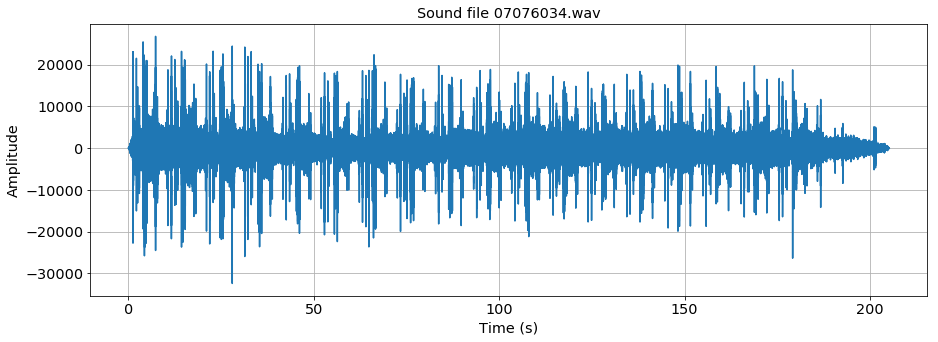

In [3]:
# Now we plot the entire audio file
import pydub
import matplotlib.pyplot as plt
import numpy as np
import wave
import scipy.signal
from scipy.fftpack import fft, fftshift
import os

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# load sound samples and plot them ...

sound = pydub.AudioSegment.from_file('/tmp/snd/'+file,format="wav")
sound = sound.set_channels(1) 
sound = pydub.effects.normalize(sound) 
samples = sound.get_array_of_samples()  
samplerate = sound.frame_rate
time = np.arange(len(samples))/float(samplerate)

fig, ax = plt.subplots()
plt.title('Sound file '+file)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#ax.set_xlim(0, 2) 
plt.grid()
plt.plot(time,samples)
plt.show()

**Analysis/Report**

We can observe highly periodic nature in the waveform .Just short while after the start we see the waveform maintain periodicity till the end.Also towards the end we see the amplitude gradually narrowing to zero ,as the sound slowly damps towards the end.Both these observations are validated after listening to the audio file as well.

On a high level pattern of repition,where the waveform is repeated around 5 times in a length of 50 secs (assuming start at 50s to 100s) translating to one cycle per 10 secs. By looking more closely we can identify periods with higher frequencies also.



2. With the audio file you have chosen, zoom into two different 25 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At 500 ms the waveform appears spikier, especially toward the end. At form with a period of about 14 ms/4 cycls, or an equivalent frequency of 285 Hz. ![My audio file zoomed in in time](https://drive.google.com/uc?id=1EfDihL76Qx6hPV9wp1wH-mPLvN9cmkrh)


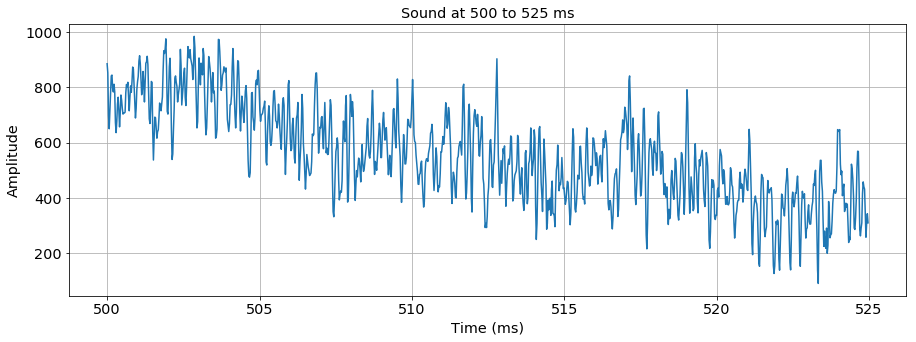

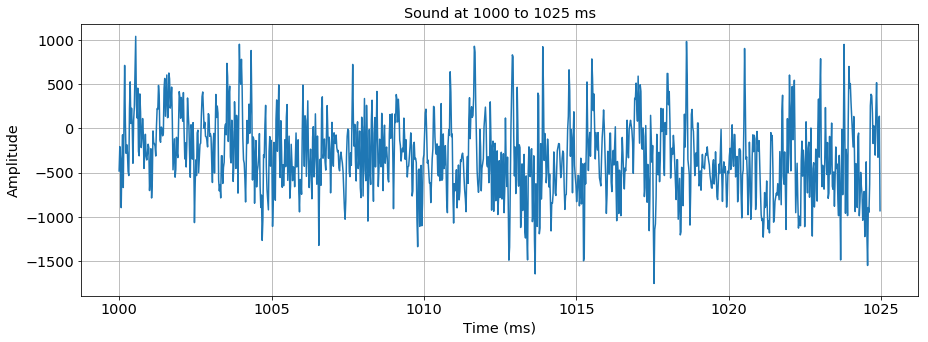

In [4]:
part = [500,1000]
for i in part:
  portion = sound[i : i + 25]
  samples = portion.get_array_of_samples() 
  time = (np.arange(len(samples))/float(samplerate))*1000 + i
  
  plt.figure()
  plt.title('Sound at ' + str(i) + ' to ' +str(i+25)+' ms')
  plt.xlabel('Time (ms)')
  plt.ylabel('Amplitude')
  plt.grid()
  plt.plot(time,samples)
  plt.show()

**Analysis/Report**

We observe very different waveforms at the different times.For the first part at 500ms we obverse that the amplitude gradually reduces from where it starts and is relatively smoother with less frequency.At 1000ms we obverse a spikier waveform.Also we see high prediocity as the patterns are repeated regularly and maintains a a level of amplitude through out,whereas at previous window the amplitudes are going down with time.

3. For each of the segments you looked at above, window them, and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to 5 kHz. Window with 1) boxcar, or 2) Hann. (This means you will have create four plots in total.)

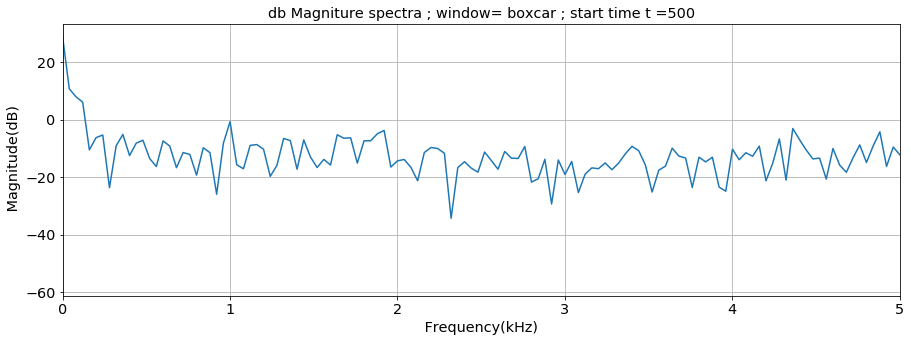

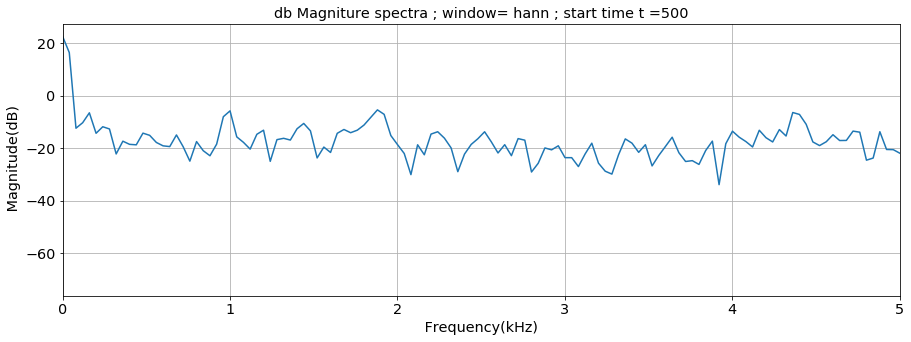

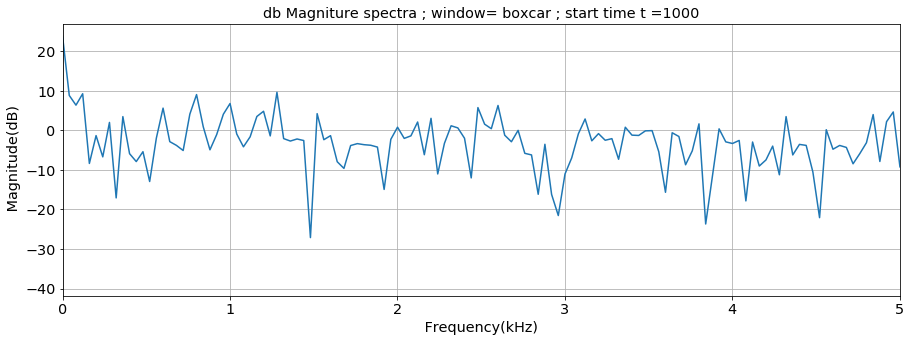

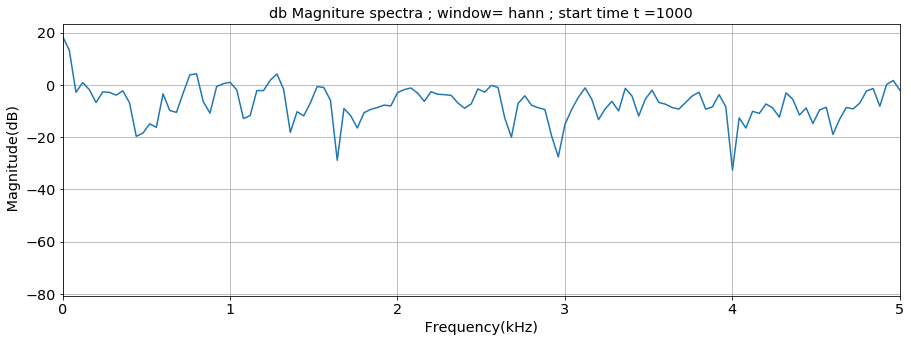

In [5]:

def applyWindow(signal, samplerate, win,w)  :  
    signal_w = signal*(win)
    #A = scipy.fftpack.fft(signal)
    #A =scipy.fftpack.fft( signal_w)/(samplerate/float(2))
    #A =np.fft.fft(signal)/(samplerate/float(2))
    A =scipy.fftpack.fft( signal_w)/(samplerate/float(2))
    freq = np.arange(len(signal)) / (len(signal) / samplerate)
    #freq = np.linspace(0, 5000, len(A))
    freq /= 1000
    response = 20 * np.log10(np.abs(A))
    #response = 20 * np.log10(np.abs(A)/np.abs(A).max())
    #response = 20 * np.log10(np.abs(A)/np.abs(np.sum(A)))
    #plt.plot(freq, response)
    return freq,response
   


for s in part:
  portion_1 = sound[s : s + 25]
  samples_1 = portion_1.get_array_of_samples()
  for w in ["boxcar","hann"]:
    
    win = scipy.signal.get_window(w,len(samples_1))
    freq,mag=applyWindow(samples_1, samplerate, win,w)
     
    fig, ax = plt.subplots()    
    plt.grid(True)
    plt.title("db Magniture spectra ; window= "+w +" ; start time t ="+str(s) )
    plt.ylabel(" Magnitude(dB)")
    plt.xlabel(" Frequency(kHz) ")    
    ax.set_xlim(0, 5)
    plt.plot(freq, mag)
    plt.show()
  
    


**Analysis/Report**

To get information about the frequency components and its energy we go into a frequency domain by applying a Fourier transform.With different window functions like boxcar and hann we different representation.
We can observe that the signal is more spiky in boxcar output than in hann window which also gives a better frequency resolution in boxcar.The hann window output seems a little smoother than boxcar version but the frequency resolution is less.
By comparing the output between two time positions ,we can observe that the output at 1000ms is overall more spiky that at 500ms.


4. For your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html).

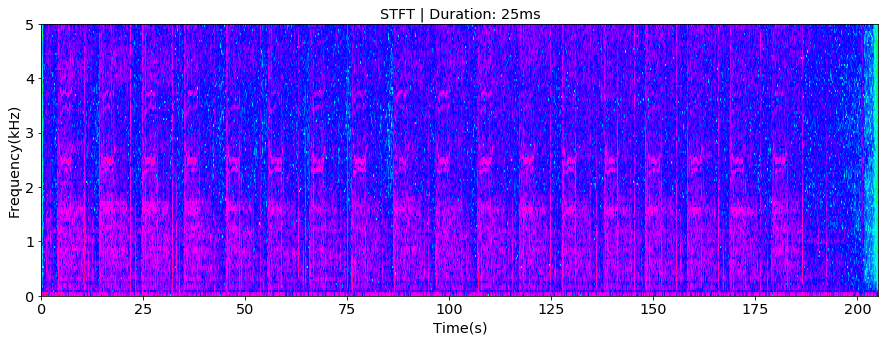

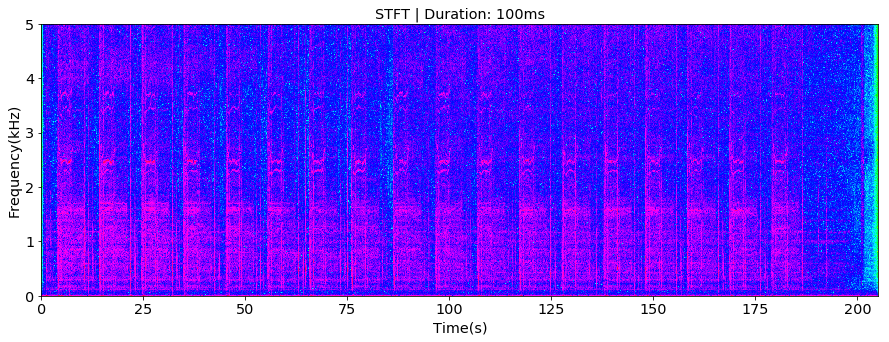

In [6]:
import scipy.signal
for i in [25,100]:
  samples = sound.get_array_of_samples()
  frame_size = samplerate/1000 * i
  hoplength = (i-10) / 1000 * samplerate 
  freq, time, stft = scipy.signal.stft(samples, samplerate, nperseg=frame_size,noverlap=hoplength,window="hann")
  mag = 20 * np.log10(np.abs(stft)/samplerate/float(2))
  freq = freq/1000
 
  plt.pcolormesh(time, freq, mag,cmap=plt.cm.get_cmap('hsv'))#,
  plt.title('STFT | Duration: ' + str(i) +  "ms")
  plt.ylabel('Frequency(kHz)')
  plt.xlabel('Time(s)')
  plt.ylim(0,5)
  plt.show()

5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.




**Analysis/Report**

With a STFT we get information about the energies across different frequencies along with temporal progression.
Different window functions and its length give us different representations.
We for short lenght of windows we get better temporal resolution whereas for longer windows we get better frequency resolution.THis can be observed in the our STFT plots,where the plot with window duration 100ms is looks more sharper that the duration of 25ms.Also in both the STFT plots we can cleary see the periodic and also intermittent nature of the signal.We can also obverve that the lower frequency range of 1kHz to 2kHz have more energy than the higher frequency ranges.

We can compare the results with that of a boxcar window .Below plot shows the STFT plot with boxcar with 100ms duration.We can clearly see that the frequency resolution is more saturated than that of hann.This verifies the understanding that boxcar window has a better frequency resolution.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


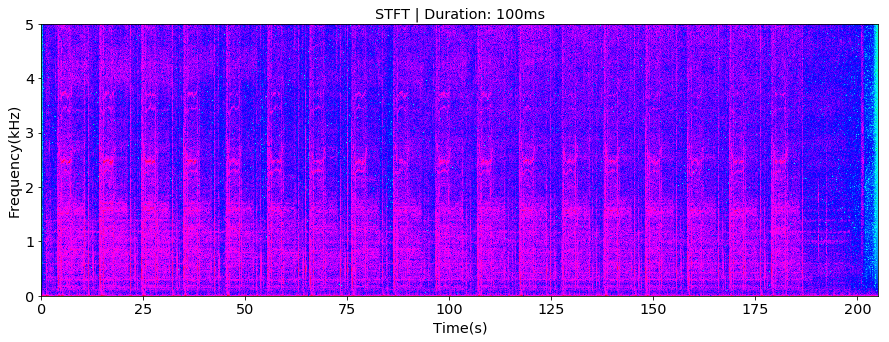

In [7]:
import scipy.signal
for i in [100]:
  samples = sound.get_array_of_samples()
  frame_size = samplerate/1000 * i
  hoplength = (i-10) / 1000 * samplerate 
  freq, time, stft = scipy.signal.stft(samples, samplerate, nperseg=frame_size,noverlap=hoplength,window="boxcar")
  mag = 20 * np.log10(np.abs(stft)/samplerate/float(2))
  freq = freq/1000
 
  plt.pcolormesh(time, freq, mag,cmap=plt.cm.get_cmap('hsv'))#,
  plt.title('STFT | Duration: ' + str(i) +  "ms")
  plt.ylabel('Frequency(kHz)')
  plt.xlabel('Time(s)')
  plt.ylim(0,5)
  plt.show()

# Part 2 Teh Machine Learnings

1. In this portion of the lab, you will work with audio recordings of two music genres: *kiki* and *bouba*. These genres are popular amongst the beings that inhabit the digital world. Download the zipfile from the Coursera lab 01 page, unzip, and upload to your Google drive. To use these in your session, adapt the following code:

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/KikiBoubadata/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2. Write a function that will take in the samples of an audio file, a frame size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [0]:

def zero_crossing(samples,frame_size): 
  total = 0
  zcc = []

  for i in range(0, len(samples), frame_size):
        chunk = samples[i:i + frame_size]
        if len(chunk) >= frame_size:
          chunk = np.array(chunk)          
          #crossing=np.where(np.diff(np.sign(chunk)))[0]
          crossing=np.where(np.sign(chunk[:-1]) != np.sign(chunk[1:]))[0] + 1
          count=len(crossing)          
          zcc.append(count)
          total += count
  
  return total, zcc

3. Using your function, compute zero crossing features for all kiki and bouba training and test samples using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a one-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like. ![My scatter plot](https://drive.google.com/uc?id=1jBBy2iTTh7hHZ53wscTXHXt-KaxROSei)

In [0]:



def getZccData(folderpath,chunksize): 
  data = {}
  fileZcc={} 
  for i in ["kiki","bouba"]:    
    
    print("Processing... " + i)
    collect = []
    fileZcc[i]=[]
    list = os.listdir( folderpath + i + "/")

    for f in list:
      if f != ".DS_Store":
        path = folderpath + i + "/" + f
        
        sound = pydub.AudioSegment.from_file(path, format="m4a")
        samples = sound.get_array_of_samples()
        samplerate = sound.frame_rate

        fsize = samplerate/1000 * chunksize #chunksize =milliseconds

        total, zcc = zero_crossing(samples,int(fsize))
        fileZcc[i].append(zcc)
        collect.append(zcc)
        
            
    data[i] = []
    for a in collect:
      for b in a:
        data[i].append(b)
     
  print("Done" ) 
  return data,fileZcc  
    
 

In [24]:
trainPath="/content/gdrive/My Drive/KikiBoubadata/kikibouba_train/"
zccTrain,fileZccTrain=getZccData(trainPath,100)
testPath="/content/gdrive/My Drive/KikiBoubadata/kikibouba_test/"
zccTest,fileZccTest=getZccData(testPath,100)

Processing... kiki
Processing... bouba
Done
Processing... kiki
Processing... bouba
Done


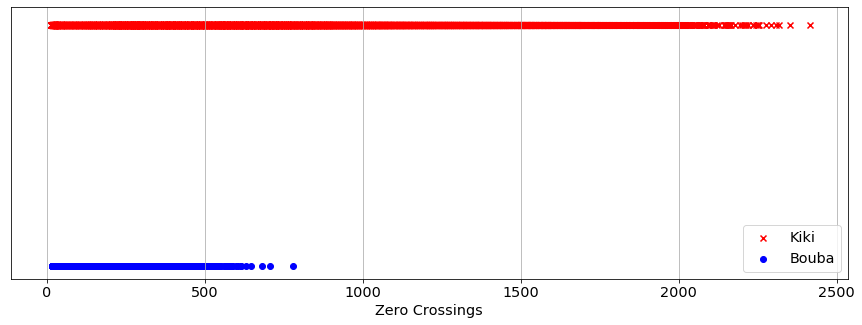

In [13]:
# plotting

fig, ax = plt.subplots()
y_k = np.zeros_like(zccTrain["kiki"]) + 0.5
y_b = np.zeros_like(zccTrain["bouba"]) 
plt.scatter(zccTrain["kiki"],y_k,  c='r', marker="x", label='Kiki')
plt.scatter(zccTrain["bouba"],y_b,  c='b', marker="o", label='Bouba')
plt.xlabel('Zero Crossings')
ax.get_yaxis().set_visible(False)
plt.grid(True)
plt.legend()
plt.show()

4. The zero crossings of frames from audio files of each class can be modeled as probability distributions. Let's model the number of zero crossings as $z \in \mathbb{N}_0$ given genre $g \in \{\textrm{Kiki},\textrm{Bouba}\}$ as a Gaussian distribution:
$f_Z(z | g) = \frac{1}{2\pi \sigma_g} e^{-(z-\mu_g)^2/2\sigma_g^2}$. Use unbiased maximum likelihood estimation to compute the parameters of the two distributions using your training observations. Plot these two distributions on top of your scatter plot. Remember, the unbiased maximum likelihood estimate of the mean of $N$ numbers $\{z_1, z_2, \ldots, z_N\}$is given by $\mu = \frac{1}{N}\sum_i z_i$, and the unbiased maximum likelihood estimate of the variance is given by $\sigma^2 = \frac{1}{N-1}\sum_i (z_i-\mu)^2$.



Text(0, 0.5, 'Probability distribution')

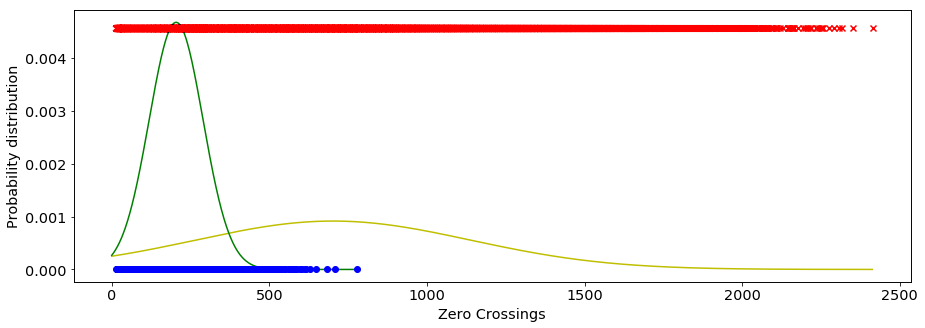

In [14]:

def gaussian(z, mu, sigma):
  p=-np.power(z - mu, 2.) / (2 * np.power(sigma, 2.))
  numerator=np.exp(p) 
  denom=np.sqrt(2 * np.pi * np.power(sigma, 2.)) 
  
  return  numerator/denom 

#for kiki
mu_kiki = np.mean(zccTrain["kiki"])
sigma_kiki = np.var(zccTrain["kiki"],ddof=1)
maxi=np.max(zccTrain["kiki"])
z_k= np.arange(0,maxi)
gaussian_k = gaussian(z_k,mu_kiki,np.sqrt(sigma_kiki))
#for bouba
mu_bouba = np.mean(zccTrain["bouba"])
sigma_bouba = np.var(zccTrain["bouba"],ddof=1)
z_b = np.arange(0,np.amax(zccTrain["bouba"]))
gaussian_b = gaussian(z_b,mu_bouba,np.sqrt(sigma_bouba))

#plotting
y_k = np.zeros_like(zccTrain["kiki"]) + 0.5
y_b = np.zeros_like(zccTrain["bouba"]) 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.scatter(zccTrain["kiki"],y_k,  c='r', marker="x", label='Kiki')
ax2.scatter(zccTrain["bouba"],y_b,  c='b', marker="o", label='Bouba')
ax2.yaxis.set_visible(False)
ax1.plot(z_k, gaussian_k, label='Kiki distribution', c="y")
ax1.plot(z_b, gaussian_b, label='Bouba distribution',c="g")
ax1.set_xlabel("Zero Crossings")
ax1.set_ylabel("Probability distribution")



5. Using the Gaussian models of the two genres, compute the optimal decision boundary for a 0-1 loss, assuming equal priors. Essentially this means you want to find the value $z$ where $P(g=\textrm{Kiki}|z) = P(g=\textrm{Bouba}|z)$. (Hint: Use Bayes' rule.) Overlay that boundary on your plot of the two distributions. Comment on where that decision boundary is located, and why it makes sense.

In [15]:
#find common point of two gaussians by solving quadratic equation
#source: http://www.jgyan.com/intersection-points-for-two-gaussian-distribution/
def getIntersect(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

#find boundary position
r=getIntersect(mu_kiki,mu_bouba,np.std(zccTrain["kiki"]),np.std(zccTrain["bouba"]))
discriminator=int(np.max(r))
print("Boundary postion ="+str(discriminator))

Boundary postion =371


Boundary postion =371


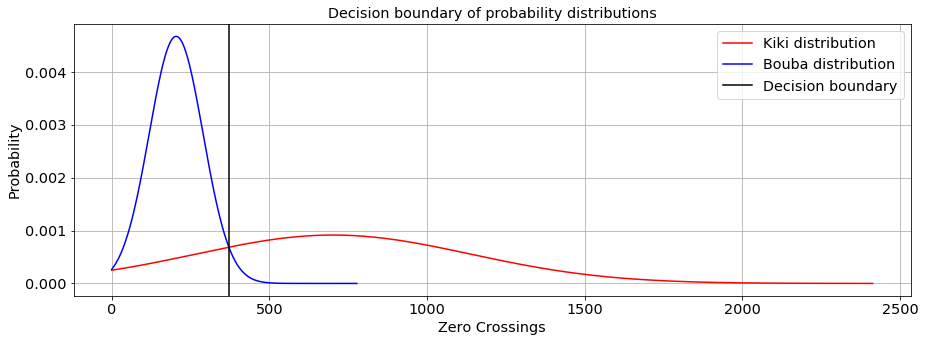

In [16]:
#plotting
print("Boundary postion ="+str(discriminator))
fig, ax1 = plt.subplots()
plt.title("Decision boundary of probability distributions")
ax1.plot(z_k, gaussian_k, label='Kiki distribution', c="r")
ax1.plot(z_b, gaussian_b, label='Bouba distribution',c="b")
ax1.axvline(x=discriminator, label='Decision boundary', c='k')
ax1.set_xlabel("Zero Crossings")
ax1.set_ylabel("Probability")
ax1.grid(True)
ax1.legend()



**Analysis/Report**

We can observe that the two distributions are different,the kiki distribution having large variance whereas the bouba distribution has less variance and is dense.This can also be validated with the scatter plots as the zero crossings of bouba are more densely located whereas those of kiki are wide spread.

The decision boundary would be the one which separates the two densities of distribution .An ideal boubary would be one with zero overlap between distribution.Practically it should be the boundary which separates the densities of the distribution so that the loss is minimum.In our case it the point where the two distributions intersect.THis is verified from out results with the decision boundary alings with the intersect point.We can conclude this way that the calculated decision boundary is indeed correct as the the two densities of distribution are clearly separted.

6. Now build your first Kiki-Bouba discriminator using that decision boundary, and test its performance on the training data, and on the testing data. Create a contingency table to summarize the results and comment. In this case, the contingency table is 2x2, where true is along the rows and predicted is along the columns. The diagonal will show correct classifications, while the off diagonal will show misclassifications:

. | Kiki Predicted | Bouba Predicted
--- | --- | ---
Kiki True |  | 
Bouba True |  | 



In [0]:
# takes the zero crossing count and the boundary and returns whether is a kiki or bouba
def classify(zcc,discriminator):
  y_pred = ""

  if zcc <= discriminator:
    y_pred = "bouba"
  else:
    y_pred = "kiki"

  return y_pred


def predict(zccdata):
  
  trueset={}
  for i in ["kiki","bouba"]:
    trueset[i]=[]
    counter=0
    zzlist=zccdata[i]
    for j in zzlist:
      if classify(j,discriminator)==i:
        counter+=1
        
    trueset[i]=counter
 
  return trueset

#call
trueTrain=predict(zccTrain)
trueTest=predict(zccTest)

trueCount={}
trueCount["train"]=trueTrain
trueCount["test"]=trueTest

#print("final map"+str(trueCount))

In [18]:
# plot
print("---Contingency table---\n")
for i in ["train","test"]:
  kiki_true = trueCount[i]["kiki"]
  bouba_true = trueCount[i]["bouba"]
  if i=="train":
    temp=zccTrain
  else :
    temp=zccTest
  kiki_true_p = round(kiki_true / len(temp["kiki"]) * 100,2)
  bouba_true_p = round(bouba_true / len(temp["bouba"]) * 100,2)
  kiki_false_p = round(100 - kiki_true_p,2)
  bouba_false_p = round(100 - bouba_true_p,2)

  print(i + " set: ")
  print("\t\t\tKiki Predicted\tBouba Predicted")
  print("\tKiki True\t"   + str(kiki_true_p) + " %" + "\t\t"    + str(kiki_false_p) + " %" )
  print("\tBouba True\t"   + str(bouba_false_p) + " %" + "\t\t"  + str(bouba_true_p) + " %" )
  

---Contingency table---

train set: 
			Kiki Predicted	Bouba Predicted
	Kiki True	72.94 %		27.06 %
	Bouba True	2.71 %		97.29 %
test set: 
			Kiki Predicted	Bouba Predicted
	Kiki True	71.76 %		28.24 %
	Bouba True	3.34 %		96.66 %


7. In the previous model, you created a classification system that worked on features computed from individual frames. Now you will create a new feature which will summarize the mean and variance of the features computed over several frames. For each continguous 1 second segment of an audio file (called a *texture window*), compute the mean and standard deviation of the zero crossings extracted from 100 ms frames in that segment. The resulting features will be two-dimensional vectors. Create a scatter plot of these features extracted from the training data. Mine looks like the below. ![My 2D scatter plot](https://drive.google.com/uc?id=1FJvsIMCY1q3UMjRm6dibAPdQEeVvxLNH)

In [0]:
#Returns texture feature of given zcc dataset and frame size
#frame size = multipler with 100ms 
def getTextureFeature(zccdata,frame_size):  
  #frame_size=10  
  textureFeature ={}
  featureMean={}
  featureStd={}

  for i in ["kiki","bouba"]: 
    genre=zccdata[i]
    textureFeature[i]=[]
    featureMean[i]=[]
    featureStd[i]=[]
    for j in range(0, len(genre), frame_size):

          window = genre[j:j + frame_size]
          window = np.array(window)
          mu=np.mean(window)
          std=np.std(window)
          vector=[mu,std]
          featureMean[i].append(mu)
          featureStd[i].append(std)
          textureFeature[i].append(vector)

  
  return textureFeature,featureMean,featureStd

#Returns texture feature of given file
#frame size = multipler with 100ms 
def getTextureFeatureSingleFile(zccdata,frame_size):
  
  #frame_size=10  
  textureFeature ={}
  featureMean={}
  featureStd={}   
  textureFeature=[]
  featureMean=[]
  featureStd=[]
  for j in range(0, len(zccdata), frame_size):
    window = zccdata[j:j + frame_size]
    window = np.array(window)
    mu=np.mean(window)
    std=np.std(window)
    vector=[mu,std]
    featureMean.append(mu)
    featureStd.append(std)
    textureFeature.append(vector)  
  return textureFeature,featureMean,featureStd


def plotScatter(featureMean,featureStd):
  
  fig, ax1 = plt.subplots()
  ax1.scatter(featureMean["kiki"],featureStd["kiki"], c='r', marker="x",alpha=0.5,label='Kiki')
  ax1.scatter(featureMean["bouba"],featureStd["bouba"], c='b', marker="o",alpha=0.3, label='Bouba')
  plt.xlabel("Mean Zero Crossings")
  plt.ylabel("STD Zero Crossings")
  ax1.legend()
  ax1.grid(True)
    

  

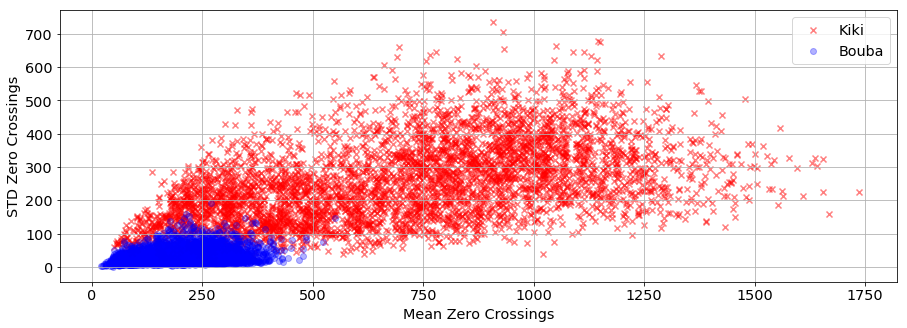

In [20]:
  
  
#call and get texture features  
textureFeatureTrain,featureMeanTrain,featureStdTrain=getTextureFeature(zccTrain,10)#effective window 18000ms
textureFeatureTest,featureMeanTest,featureStdTest=getTextureFeature(zccTest,10)#effective window 18000ms

#plot
plotScatter(featureMeanTrain,featureStdTrain)
#plotScatter(featureMeanTest,featureStdTest)

8. You know what's next! Create a two-dimensional linear classifier with equal priors, and test it on these new features extracted from the training dataset and testing dataset. Summarize the performance with contingency tables and comment on the results, comparing with frame-wise classification experiments you ran in question 6.

In [21]:
#training model and prediction ...

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.vstack( (textureFeatureTrain["kiki"],textureFeatureTrain["bouba"]) )

kiki_label_train = np.repeat("kiki",len(textureFeatureTrain["kiki"]))
bouba_label_train = np.repeat("bouba",len(textureFeatureTrain["bouba"]))
y = np.hstack( (kiki_label_train,bouba_label_train) )

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X,y)

xTrain_k=textureFeatureTrain["kiki"]
xTrain_b=textureFeatureTrain["bouba"]
acc_kiki=X_lda.score(xTrain_k,kiki_label_train)*100
acc_bouba=X_lda.score(xTrain_b,bouba_label_train)*100
false_kiki=100-acc_kiki
false_bouba=100-acc_bouba 

print(" train set: ")
print("\t\t\tKiki Predicted\tBouba Predicted")
print("\tKiki True\t" +  str(np.round(acc_kiki,2)) + "\t" + "\t" + str(np.round(false_kiki,2) ))
print("\tBouba True\t" + str(np.round(false_bouba,2)) + "\t"+ "\t"+ str(np.round(acc_bouba,2)) )
print("--------")

kiki_label_test = np.repeat("kiki",len(textureFeatureTest["kiki"]))
bouba_label_test = np.repeat("bouba",len(textureFeatureTest["bouba"]))
xTest_k=textureFeatureTest["kiki"]
xTest_b=textureFeatureTest["bouba"]
acc_kiki=X_lda.score(xTest_k,kiki_label_test)*100
acc_bouba=X_lda.score(xTest_b,bouba_label_test)*100
false_kiki=100-acc_kiki
false_bouba=100-acc_bouba 

print(" test set: ")
print("\t\t\tKiki Predicted\tBouba Predicted")
print("\tKiki True\t" +  str(np.round(acc_kiki,2)) + "\t" + "\t" + str(np.round(false_kiki,2) ))
print("\tBouba True\t" + str(np.round(false_bouba,2)) + "\t"+ "\t"+ str(np.round(acc_bouba,2)) )
print("--------")



 train set: 
			Kiki Predicted	Bouba Predicted
	Kiki True	80.48		19.52
	Bouba True	0.04		99.96
--------
 test set: 
			Kiki Predicted	Bouba Predicted
	Kiki True	79.74		20.26
	Bouba True	0.07		99.93
--------


**Analysis/Report**

THe accuracy on the texture feature is improved compared to the previous .We can see that the accuracy on test set increases roughly 7% in case of kiki and roughly 3% in case of bouba, reaching 99.9% accuracy.

9. Finally, find the number of seconds that the texture window must be such that the accuracy of the resulting linear classification model is 99% in the testing dataset. Give the resulting confusion table for just the testing dataset.


**Analysis/Report**

Running the prediction on texture features of different lengths gave the below results.
*Test* set accuracies percentage for differnt window size :

*   2000ms -  kiki 81.5 % ,bouba 100% ,and stays 100 beyond,
*   9000ms - kiki 87%
*15000ms- kiki 98% 
*15000ms -  kiki 99.34%
*18000ms - kiki 99.6% ,train 100%
*30000ms- Training kiki 99% ,Test 97%(probably overfits here)

**Best accuracy 99.61% at 18000ms (18secs)**

Cleary the length of the window plays an important role in classification.THis can also be visualized by plotting the scatter plot of zero crossings at 18sec shown below.We observe a clear separation between the two classes whereas before it had some overlap which reduces the classification accuracy.




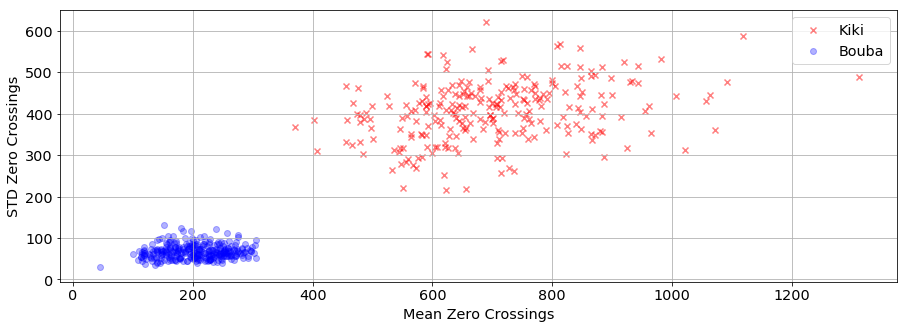

In [22]:
textureFeatureTrain,featureMeanTrain,featureStdTrain=getTextureFeature(zccTrain,180)#effective window 18000ms
#plot
plotScatter(featureMeanTrain,featureStdTrain)


10. Finally finally, using the model you built in #8, create a classifier that will make a decision for an *audio file* based on a majority vote of the classifications of all features extracted from that file. Give the resulting confusion table for just the testing dataset.

In [23]:
#predict input feature using trained model
def predictFile(feature,l):
   
  bouba_label = np.repeat("bouba",l)
  kiki_label = np.repeat("kiki",l)
  boubaScore=X_lda.score(feature,bouba_label)
  kikiScore=X_lda.score(feature,kiki_label)
 
  if boubaScore > kikiScore :
   
    return "bouba"
  else :
   
    return "kiki"

  
  
trueCount = {}
total = {}
frame_size=200 #frame_size ,10=1sec final effective window

for i in ["kiki","bouba"]:
  print("Processing...: " + i)
  trueCount[i]=0
  genre=fileZccTest[i]
  total[i] = len(genre)
  for j in genre:
    feature,mean,std=getTextureFeatureSingleFile(j,frame_size)
   
    prediction=predictFile(feature,len(feature))
    if prediction == i:      
        trueCount[i] += 1     
            
    
kiki_true = trueCount["kiki"]
bouba_true = trueCount["bouba"]
kiki_true_percent = round(kiki_true / total["kiki"] * 100,2)
bouba_true_percent = round(bouba_true / total["bouba"] * 100,2)

kiki_wrong_percent = round(100 - kiki_true_percent,2)
bouba_wrong_percent = round(100 - bouba_true_percent,2)

print("\n-----Test set result----: ")
print("\t\tKiki Predicted\tBouba Predicted")
print("Kiki True\t"   + str(kiki_true_percent) + " %" + "\t\t"   + str(kiki_wrong_percent) + " %" )
print("Bouba True\t"  + str(bouba_wrong_percent) + " %" + "\t\t"   + str(bouba_true_percent) + " %" )

Processing...: kiki
Processing...: bouba

-----Test set result----: 
		Kiki Predicted	Bouba Predicted
Kiki True	100.0 %		0.0 %
Bouba True	0.0 %		100.0 %


**Analyis/Report**

We observe an improved accuracy on final trained model with a perfect accuracy.With different texture feature window size we get different results so choosing the right parameter is necessary.Hence the feature which we use to train our model is important.

This study reflects that how a simple linear classifier on gaussian distribution with a simple zero crossing feature  can be successfully used to classify different classes of music.With more data and advanced features complex genre classification seems promising.With more overlap of distributions however complex features and models may be necessary.

Upon final reflection,I find the assignment course and assignment interesting.Learning signal processing techiniques are vital towards understanding how to process music data further and also very interesting.Understanding the interplay between different properties of a signal like frequency,time and energy was a little confusing before but its more clearer now after the assignment.Along with that applying machine learning techniques to music and sound is exciting which could bring out creative applications.
